In [82]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
seed=42
np.random.seed=seed

In [53]:
img_width = 128 
img_height = 128
img_channels = 3

In [54]:
## Setting the training and testing paths
train_path = '/Users/samarpanguha/Downloads/Deep learning/Image segmentation/data-science-bowl-2018/stage1_train/'
test_path = '/Users/samarpanguha/Downloads/Deep learning/Image segmentation/data-science-bowl-2018/stage1_test/'

- https://www.kaggle.com/c/data-science-bowl-2018/rules

In [55]:
## Lets read all the ids for training images
train_ids = next(os.walk(train_path))[1]
(train_ids)

['5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856',
 '68f833de9f8c631cedd7031b8ed9b908c42cbbc1e14254722728a8b7d596fd4c',
 '6c67b78e8164801059375ed9a607f61e67a7ae347e92e36a7f20514224541d56',
 'e1bcb583985325d0ef5f3ef52957d0371c96d4af767b13e48102bca9d5351a9b',
 'a4c44fc5f5bf213e2be6091ccaed49d8bf039d78f6fbd9c4d7b7428cfcb2eda4',
 '3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225',
 'a0afead3b4fe393f6a6159de040ecb2e66f8a89090abf0d0bf5b8e1d38ae667c',
 '98a463483fe3a56deacc8bc00ab8aa62668bd40ad0c70bbe7deb10d3e4aeb0c0',
 'd3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7',
 'c0152b1a260e71f9823d17f4fbb4bf7020d5dce62b4a12b3099c1c8e52a1c43a',
 'e7a3a7c99483c243742b6cfa74e81cd48f126dcef004016ad0151df6c16a6243',
 '4ff152d76db095f75c664dd48e41e8c9953fd0e784535883916383165e28a08e',
 'fadeb0ab092833f27daaeb3e24223eb090f9536b83f68cde8f49df7c544f711b',
 '1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5',
 '2d53d7ec0c579fffd6710c956288537d

In [56]:
## Lets read all the ids for test images
test_ids = next(os.walk(test_path))[1]
(test_ids)

['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0',
 '44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078',
 '5cee644e5ffbef1ba021c7f389b33bafd3b1841f04d3edd7922d5084c2c4e0c7',
 'ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e',
 '17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff',
 'a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d',
 'ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef',
 '0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5',
 '1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b',
 'ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8',
 '505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81',
 'da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab',
 '0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6',
 '4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee',
 'a4816cc1fb76cb3c5e481186833fc0ae

In [57]:
## Lets create an array of the same dimension of the image
X_train = np.zeros((len(train_ids),img_height,img_width,img_channels),dtype = np.uint8)
Y_train = np.zeros((len(train_ids),img_height,img_width,1),dtype = np.bool)

In [58]:
X_train

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [59]:
Y_train

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [Fa

In [60]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = train_path + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_channels]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
     
    mask = np.zeros((img_height, img_width, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (img_height, img_width), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

  0%|          | 2/670 [00:00<01:06, 10.00it/s]

Resizing training images and masks


100%|██████████| 670/670 [05:45<00:00,  1.94it/s]


In [62]:
# test images
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = test_path + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_channels]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

  3%|▎         | 2/65 [00:00<00:03, 18.94it/s]

Resizing test images


100%|██████████| 65/65 [00:02<00:00, 31.04it/s]

Done!


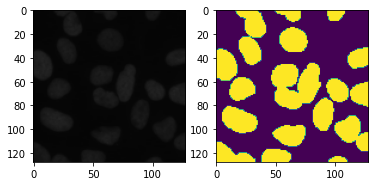

In [79]:
## Lets pick a random training image and testing and see it
image_x = random.randint(0,len(train_ids))
plt.subplot(1,2,1)
plt.imshow(X_train[image_x])
plt.subplot(1,2,2)
plt.imshow(np.squeeze(Y_train[image_x]))

In [80]:
## Build the model

inputs = tf.keras.layers.Input((img_width,img_height,img_channels))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)  # Normalizing the images

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s) ## padding=same for inp size=out size after conv operation
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [8]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [81]:
################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Train on 603 samples, validate on 67 samples
Epoch 1/25
603/603 [==============================] - 55s 90ms/sample - loss: 0.4537 - accuracy: 0.8063 - val_loss: 0.2722 - val_accuracy: 0.8632
Epoch 2/25
603/603 [==============================] - 62s 102ms/sample - loss: 0.2393 - accuracy: 0.8854 - val_loss: 0.1676 - val_accuracy: 0.9310
Epoch 3/25
603/603 [==============================] - 65s 109ms/sample - loss: 0.1565 - accuracy: 0.9398 - val_loss: 0.1398 - val_accuracy: 0.9421
Epoch 4/25
603/603 [==============================] - 61s 102ms/sample - loss: 0.1274 - accuracy: 0.9506 - val_loss: 0.1095 - val_accuracy: 0.9580
Epoch 5/25
603/603 [==============================] - 54s 90ms/sample - loss: 0.1168 - accuracy: 0.9553 - val_loss: 0.1029 - val_accuracy: 0.9592
Epoch 6/25
603/603 [==============================] - 58s 95ms/sample - loss: 0.1080 - accuracy: 0.9583 - val_loss: 0.1043 - val_accuracy: 0.9609
Epoch 7/25
603/603 [==============================] - 55s 91ms/sample - loss

65/65 [==============================] - 2s 24ms/sample


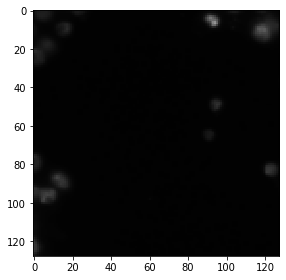

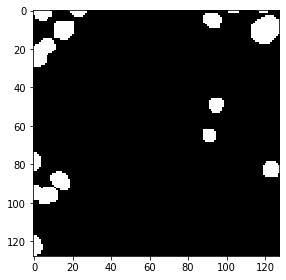

/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


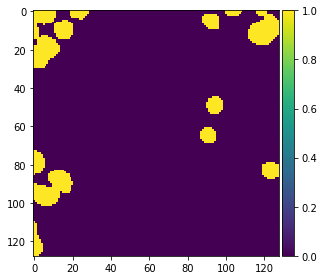

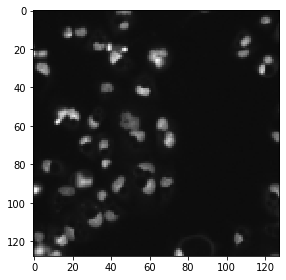

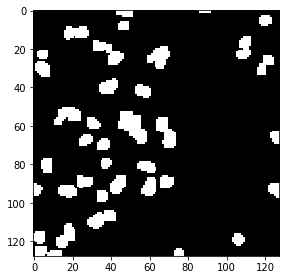

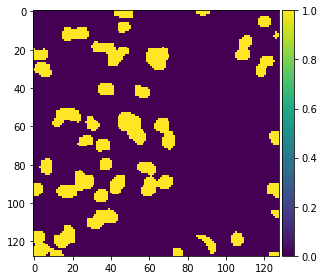

In [83]:
####################################

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

## Binary pred 
preds_train_t = (preds_train > 0.5).astype(np.uint8) ## Any pixel above 0.5 is a cell otherwise it is a background
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [85]:
#!tensorboard --logdir=logs/ --hostlocalhost --port 8088